# Importing the libraries

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, utils
from tensorflow import keras
from matplotlib import pyplot as plt

import sys
sys.path.insert(0, '../')
from plot_graphs import plot_loss, plot_acc

# Setting Image and Batch size

In [8]:
IMAGE_SIZE = 100
BATCH_SIZE = 32

# Importing the train, test, and val data

In [9]:
train = utils.image_dataset_from_directory("../datasets/data/split/Zenodo/train", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)
val = utils.image_dataset_from_directory("../datasets/data/split/Zenodo/val", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)
test = utils.image_dataset_from_directory("../datasets/data/split/Zenodo/test", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)


Found 3360 files belonging to 6 classes.
Found 720 files belonging to 6 classes.
Found 720 files belonging to 6 classes.


# Preprocessing the data for VGG16

In [10]:
train = train.map(lambda x, y: (tf.keras.applications.vgg16.preprocess_input(x), y))
val = val.map(lambda x, y: (tf.keras.applications.vgg16.preprocess_input(x), y))
test = test.map(lambda x, y: (tf.keras.applications.vgg16.preprocess_input(x), y))

# Defining the model

In [11]:
model = tf.keras.applications.VGG16(
    include_top=True,
    weights=None,
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),
    pooling='avg',
    classes=6,
    classifier_activation="softmax"
)

model.compile(optimizer=keras.optimizers.RMSprop(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

# Running the Model

In [12]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=5
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="../models/sota/sota_vgg16.h5",
        monitor="val_accuracy",
        save_best_only=True
    )
]

history = model.fit(
  train.cache(),
  epochs=20,
  callbacks=callbacks_list,
  validation_data=val.cache()
)

Epoch 1/20


2022-08-07 17:49:36.005723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


105/105 [==============================] - ETA: 0s - loss: 1.3515 - accuracy: 0.4604

2022-08-07 17:50:29.256805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


105/105 [==============================] - 57s 531ms/step - loss: 1.3515 - accuracy: 0.4604 - val_loss: 0.6520 - val_accuracy: 0.7319
Epoch 2/20
105/105 [==============================] - 56s 528ms/step - loss: 0.6206 - accuracy: 0.7720 - val_loss: 0.3396 - val_accuracy: 0.8833
Epoch 3/20
105/105 [==============================] - 55s 526ms/step - loss: 0.3586 - accuracy: 0.8774 - val_loss: 0.3141 - val_accuracy: 0.8931
Epoch 4/20
105/105 [==============================] - 56s 530ms/step - loss: 0.2559 - accuracy: 0.9113 - val_loss: 0.3367 - val_accuracy: 0.9097
Epoch 5/20
105/105 [==============================] - 57s 544ms/step - loss: 0.1725 - accuracy: 0.9381 - val_loss: 0.2944 - val_accuracy: 0.9139
Epoch 6/20
105/105 [==============================] - 57s 547ms/step - loss: 0.1487 - accuracy: 0.9476 - val_loss: 0.2915 - val_accuracy: 0.8986
Epoch 7/20
105/105 [==============================] - 57s 539ms/step - loss: 0.1195 - accuracy: 0.9601 - val_loss: 0.2497 - val_accuracy: 0.9

# Evaluating the model

In [13]:
# model.evaluate(test)

load_model = keras.models.load_model("../models/sota/sota_vgg16.h5")
load_model.evaluate(test)

2022-08-07 18:00:55.042375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 3s 135ms/step - loss: 0.1837 - accuracy: 0.9361


[0.1836548149585724, 0.9361111521720886]

<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/matplotlib/pyplot.py'>

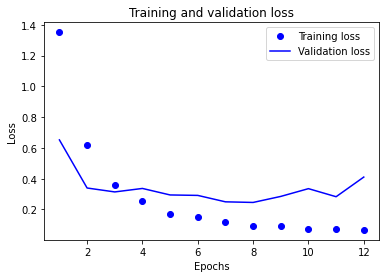

In [14]:
# Plotting loss and accuracy graphs
## Plotting loss
plot_loss(history)


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/matplotlib/pyplot.py'>

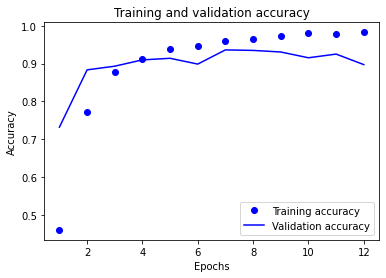

In [15]:
## Plotting accuracy
plot_acc(history)